# Intro for the Spaceship Titanic

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Kaggle link:
https://www.kaggle.com/competitions/spaceship-titanic/overview

## Check everything about the dataset
It is essential to know the features and outcomes, then decide what model should be considered.

In [2]:
# let us go through the dataset 
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.head(10)  

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Clearly, it should be a classification project, the 'transported' as the outcome should be associated with features given.

We should consider a binary classification problem since the target variable (transported) is binary (True or False). Given the nature of your dataset, a few suitable models come to mind:

Logistic Regression: This is a good starting point for binary classification problems. It's simple, interpretable, and can perform well on linearly separable data.

Random Forest: A more complex model that can handle nonlinear relationships and interactions between features. It's robust to overfitting and can be very effective for a wide range of classification tasks.

Gradient Boosting Machines (like XGBoost or LightGBM): These are powerful models that often provide the best performance for classification tasks. They build trees in a sequential manner, where each tree attempts to correct the errors of the previous one.

Support Vector Machine (SVM): Effective in high-dimensional spaces and also in cases where the number of dimensions is greater than the number of samples.

Neural Networks: If your dataset is large and complex, neural networks can capture complex patterns. They require more computational resources and effort in tuning.

In [3]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: ylabel='Transported'>

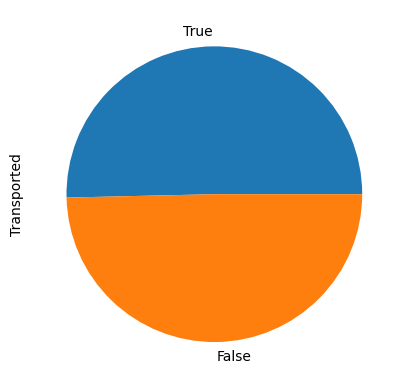

In [15]:
plot_df_train = df_train.Transported.value_counts()
plot_df_train.plot(kind = 'pie')

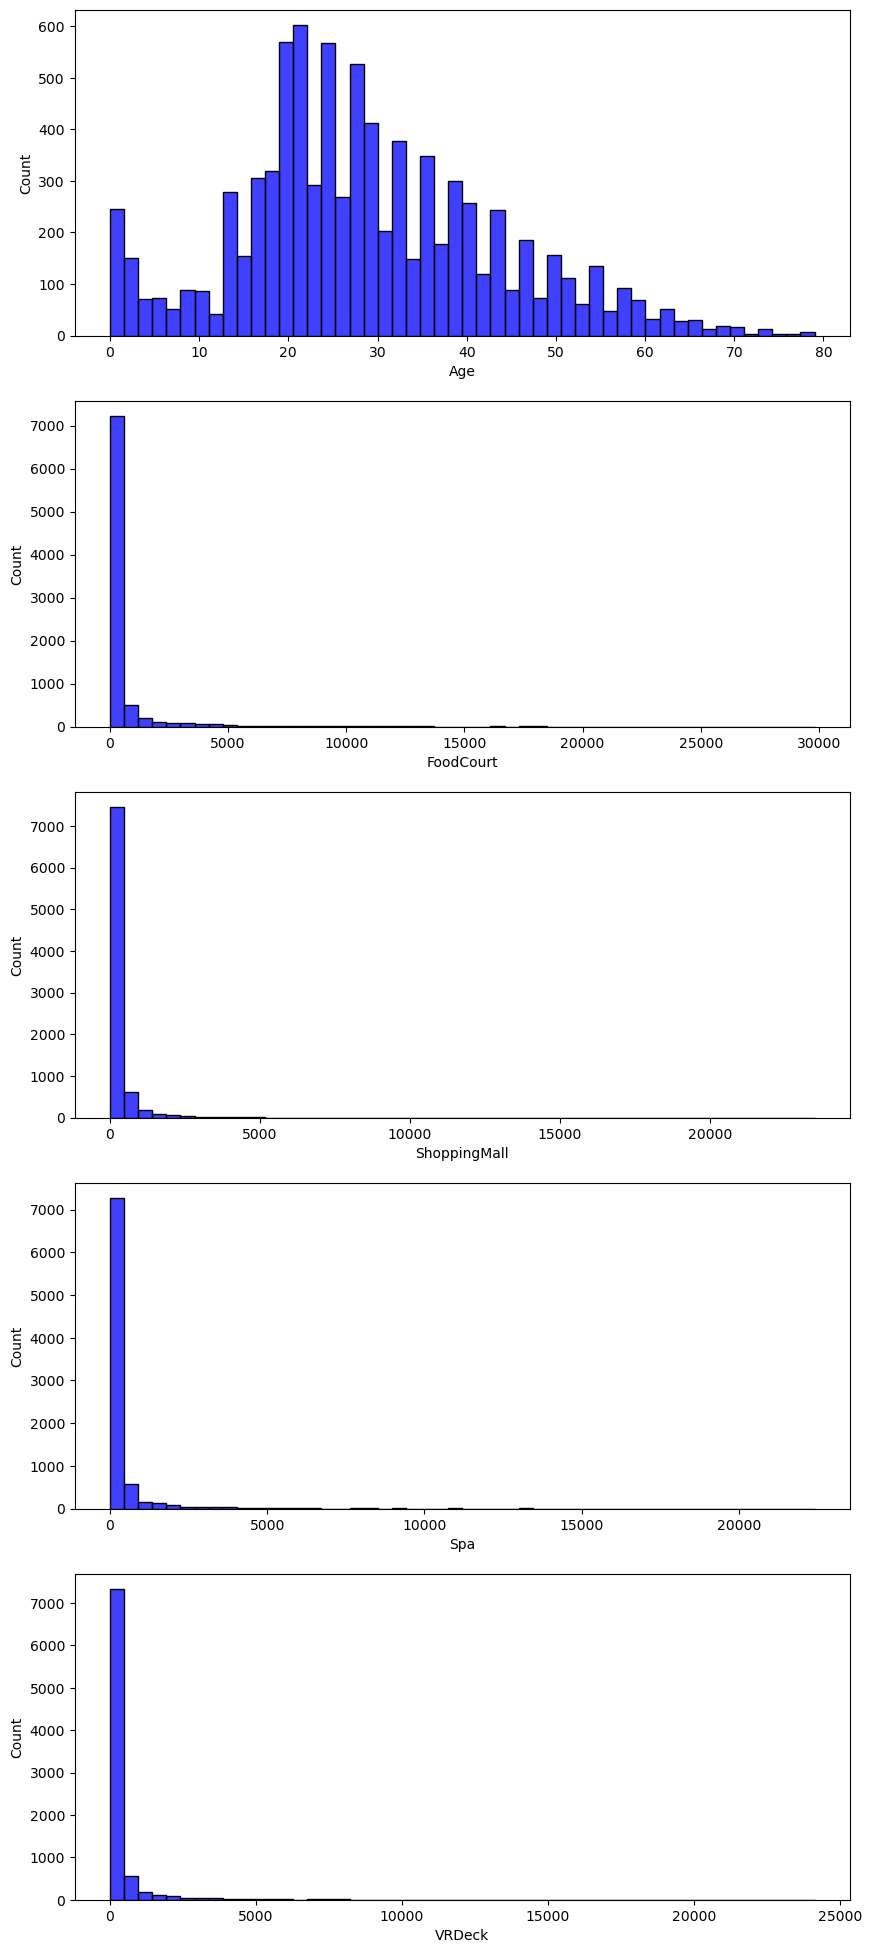

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df_train['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df_train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df_train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df_train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df_train['VRDeck'], color='b', bins=50, ax=ax[4]);

In [32]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Preprocessing the dataset
Generally, the missing value above can be filled with mean or median for numerical type, but consider the total samples is 8600+ and only handreds of samples are missing, it would be easier to drop them.

In [35]:
df_cleaned = df_train.dropna(subset=['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6764 non-null   object 
 1   HomePlanet    6764 non-null   object 
 2   CryoSleep     6764 non-null   object 
 3   Cabin         6764 non-null   object 
 4   Destination   6764 non-null   object 
 5   Age           6764 non-null   float64
 6   VIP           6764 non-null   object 
 7   RoomService   6764 non-null   float64
 8   FoodCourt     6764 non-null   float64
 9   ShoppingMall  6764 non-null   float64
 10  Spa           6764 non-null   float64
 11  VRDeck        6764 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6764 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 746.4+ KB


In [39]:
# Name and ID is not in use for training
df_train_cleaned = df_cleaned.drop(['PassengerId','Name'],axis=1)
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6764 non-null   object 
 1   CryoSleep     6764 non-null   object 
 2   Cabin         6764 non-null   object 
 3   Destination   6764 non-null   object 
 4   Age           6764 non-null   float64
 5   VIP           6764 non-null   object 
 6   RoomService   6764 non-null   float64
 7   FoodCourt     6764 non-null   float64
 8   ShoppingMall  6764 non-null   float64
 9   Spa           6764 non-null   float64
 10  VRDeck        6764 non-null   float64
 11  Transported   6764 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 640.7+ KB


## Training the model 
Preprocess the Data: Handle missing values, encode categorical variables, and normalize/standardize the features. 
Split the Data: Divide your dataset into training and testing sets.

Choose a Model and Train It: Import the model from a library like scikit-learn, create an instance of the model, and train it on your training data.

Evaluate the Model: Use accuracy to evaluate your model on the testing set.

In [46]:
#transfer the bool type in 'Transported' into 0 and 1
Bool_sym = {True: 1, False: 0}
df_train_cleaned['Transported'] = df_train_cleaned['Transported'].map(Bool_sym)

In [47]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6764 non-null   object 
 1   CryoSleep     6764 non-null   object 
 2   Cabin         6764 non-null   object 
 3   Destination   6764 non-null   object 
 4   Age           6764 non-null   float64
 5   VIP           6764 non-null   object 
 6   RoomService   6764 non-null   float64
 7   FoodCourt     6764 non-null   float64
 8   ShoppingMall  6764 non-null   float64
 9   Spa           6764 non-null   float64
 10  VRDeck        6764 non-null   float64
 11  Transported   6764 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 687.0+ KB


Convert categorical variables such as HomePlanet, CryoSleep, Destination, and VIP into a format that can be provided to a machine learning model, like numeric vectors.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Selecting relevant features and excluding 'Transported' which should be the target
features = df_train_cleaned.drop(columns=['Transported'])
target = df_train_cleaned['Transported']

# Identifying categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers for the preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = SimpleImputer(strategy='mean')

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

# Creating a pipeline with preprocessing and the model
model = make_pipeline(preprocessor, LogisticRegression(max_iter=2000))

# Training the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score

/Users/fanzhiwei/miniforge3/envs/dl_mac/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8597301792644613, 0.7982261640798226)

### comment on logistic regression: 
These accuracies indicate that the model performs reasonably well on both the training and testing sets, showing no significant signs of overfitting or underfitting. However, for more complex datasets or to improve performance, consider experimenting with other models (e.g., Random Forest, Gradient Boosting).

## Random Forest Tree 
Since we have a baseline of accuracy using LogisticRegression, in the following, we adopt random forest model to check the performance.

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline with preprocessing and the RandomForest model
rf_model = make_pipeline(preprocessor, RandomForestClassifier(random_state=43))

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

rf_train_score, rf_test_score


(0.9998151912770282, 0.7989652623798965)

### The tuning of parameters
Here's a conceptual idea showing how we might apply GridSearchCV to tune a RandomForestClassifier. Note that executing this example as-is may take a considerable amount of computational time due to the extensive search space

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'randomforestclassifier__max_depth': None,
  'randomforestclassifier__min_samples_split': 5,
  'randomforestclassifier__n_estimators': 500},
 0.7919017311739316)

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Adjusting the RandomForest model with the optimized parameters
optimized_rf_model = make_pipeline(preprocessor, RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    random_state=42
))

# Retraining the model with the optimized parameters on the full training data
optimized_rf_model.fit(X_train, y_train)

# Evaluating the optimized model on the training and test data
optimized_train_score = optimized_rf_model.score(X_train, y_train)
optimized_test_score = optimized_rf_model.score(X_test, y_test)

optimized_train_score, optimized_test_score


(0.997967104047311, 0.8063562453806357)

In [320]:
df_test = pd.read_csv('test.csv')
optimized_test = optimized_rf_model.predict(df_test)

In [321]:
passenger_ids = df_test['PassengerId']
decode = {1:True, 0: False}
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': optimized_test
})
submission_df['Transported'] = submission_df['Transported'].map(decode) 

# Save the DataFrame to a CSV file
submission_df.to_csv('my_submission5.csv', index=False)

### Comments on random forest
The score you've received from the GridSearchCV output represents the best cross-validated training score. Specifically, it's the average score across all folds of the cross-validation for the best combination of parameters found (max_depth=None, min_samples_split=5, n_estimators=500). This score is not directly comparable to the simple train/test split scores previously mentioned because it's derived from a more robust process that averages the model's performance across multiple subsets of the data.
However, even the traning set seems overfitting, the test score is not bad. For the time being, our discussion will expand to the next XGBoost model.

## XGBoost model
XGBoost (Extreme Gradient Boosting) is not simply an optimized version of Random Forest; it's a different algorithm based on gradient boosting. While both Random Forest and XGBoost are ensemble methods that use decision trees as base learners, they work quite differently:

Random Forest builds trees in parallel and combines their predictions through averaging (for regression) or majority voting (for classification). It reduces variance and is less likely to overfit.

XGBoost builds trees sequentially, where each new tree attempts to correct the errors made by the previous trees. It focuses on reducing bias and variance through gradient boosting, a technique that optimizes a loss function.

XGBoost has gained popularity due to its speed and performance, particularly on structured data and tabular datasets. It can handle missing values, provides regularization to prevent overfitting, and is highly tunable with a variety of hyperparameters.

In [68]:
import xgboost as xgb


# Creating an XGBoost classifier
xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(n_estimators=30, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=43))
xgb_model.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)


# Training the model
xgb_model.fit(X_train, y_train)

# Evaluating the model
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

xgb_train_score, xgb_test_score


(0.807614119386435, 0.8100517368810052)

In [322]:
df_test = pd.read_csv('test.csv')
xgb_test = xgb_model.predict(df_test)

passenger_ids = df_test['PassengerId']
decode = {1:True, 0: False}
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': xgb_test
})
submission_df['Transported'] = submission_df['Transported'].map(decode) 

# Save the DataFrame to a CSV file
submission_df.to_csv('my_submission6.csv', index=False)

### comments on XGBoost
Here we tried some parameters on n_estimators, max_depth, and at best we can reach 81% accuracy on test set.

Understanding Key Hyperparameters

n_estimators: This parameter specifies the number of trees in the forest. The default value is often around 100. Increasing n_estimators can improve the model's performance but also increases the computational cost and time for training. Beyond a certain point, the benefit in accuracy plateaus.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Limiting the depth of the tree helps prevent overfitting by reducing the model's complexity.


In [71]:
#Now we apply the XGBoost model to the test.csv
df_test = pd.read_csv('test.csv')
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [73]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split

# # Load your training data
# df_train_cleaned = pd.read_csv('path_to_your_train_dataset.csv')

# # Preprocess and Train (as you've outlined)
# features = df_train_cleaned.drop(columns=['Transported'])
# target = df_train_cleaned['Transported']
# categorical_cols = features.select_dtypes(include=['object']).columns
# numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

# categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# numerical_transformer = SimpleImputer(strategy='mean')

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=43))
xgb_model.fit(X_train, y_train)

# Prepare test features
test_features =df_test.drop(columns=['PassengerId', 'Name'])


# Predict using the trained pipeline
test_predictions = xgb_model.predict(test_features)


In [74]:
test_predictions

array([1, 0, 1, ..., 1, 1, 0])

In [77]:
#assemble to the submission format
passenger_ids = df_test['PassengerId']
decode = {1:True, 0: False}
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': test_predictions
})
submission_df['Transported'] = submission_df['Transported'].map(decode) 

# Save the DataFrame to a CSV file
submission_df.to_csv('my_submission.csv', index=False)

# Above model gives 77.1% accuracy in Kaggle estimation, let's try to improve it.
First of all, the feature engineering, reconsider that if every feature in the list is essential to the result.

In [82]:
import pandas as pd
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load your training data
df_train = pd.read_csv('train.csv')

# Preprocess and Train (as you've outlined)
features = df_train.drop(columns=['PassengerId','Name','Cabin','Transported'])
target = df_train['Transported']
categorical_cols = features.select_dtypes(include=['object','bool']).columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(use_label_encoder=False, eval_metric='error', random_state=43))
xgb_model.fit(X_train, y_train)


# Evaluating the model
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

xgb_train_score, xgb_test_score

(0.8928674144377337, 0.777458309373203)

In [83]:
df_train['Cabin']


0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [84]:
df_train[["Deck", "Cabin_num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

In [118]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [117]:
# Preprocess and Train (as you've outlined)
features = df_train.drop(columns=['PassengerId','Name','Cabin','Transported'])
target = df_train['Transported']
categorical_cols = features.select_dtypes(include=['object','bool']).columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = SimpleImputer(strategy='median')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=43))
xgb_model.fit(X_train, y_train)


# Evaluating the model
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

xgb_train_score, xgb_test_score

(0.8304572907679033, 0.7918343875790684)

In [109]:
df_test[["Deck", "Cabin_num", "Side"]] = df_test["Cabin"].str.split("/", expand=True)
test_features = df_test.drop(columns=['PassengerId','Name','Cabin'])
test_predictions = xgb_model.predict(test_features)

passenger_ids = df_test['PassengerId']
decode = {1:True, 0: False}
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': test_predictions
})
submission_df['Transported'] = submission_df['Transported'].map(decode) 

# Save the DataFrame to a CSV file
submission_df.to_csv('my_submission2.csv', index=False)

### 3rd time attemptions, by dividing the age group


In [384]:
df_train = pd.read_csv('train.csv')

# Feature Engineering Steps
# 1. Splitting the 'Cabin' into multiple parts: 'Deck', 'Num', and 'Side'
df_train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_train['Cabin'].str.split('/', expand=True)
df_train ['window'] = df_train['Cabin_Deck'].apply(lambda x: 1  if x in ['A','F'] else 0)

# # 3. Creating a total spending feature
# spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# df_train['Total_Spending'] = df_train[spending_features].sum(axis=1)

# # 4. Creating age groups
# df_train['Age_Group'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Displaying the first few rows of the modified dataframe
df_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,window
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1


In [386]:
# Preprocess and Train (as you've outlined)
features = df_train.drop(columns=['PassengerId','Name','Cabin','Transported'])
target = df_train['Transported']
categorical_cols = features.select_dtypes(include=['object','bool']).columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = SimpleImputer(strategy='median')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=5)

record = []
for i in range(80):
    boost_trees = 30+3*i
    xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(
        n_estimators=boost_trees,
        max_depth=4,
        learning_rate=0.1,  
        # subsample=0.8,       
        # colsample_bytree=0.8,  
        # gamma=1,            
        # reg_lambda=1,        #  (L2 regularization)
        # reg_alpha=0.1,       #  (L1 regularization)
        use_label_encoder=False, 
        eval_metric='error',
        random_state=5))
    xgb_model.fit(X_train, y_train)


    # Evaluating the model
    xgb_train_score = xgb_model.score(X_train, y_train)
    xgb_test_score = xgb_model.score(X_test, y_test)

    xgb_train_score, xgb_test_score
    record.append((boost_trees, xgb_test_score, xgb_train_score))
record

[(30, 0.7855089131684876, 0.8133448375035951),
 (33, 0.7855089131684876, 0.813920046016681),
 (36, 0.7889591719378953, 0.8149266609145815),
 (39, 0.7883841288096607, 0.815933275812482),
 (42, 0.7901092581943646, 0.816508484325568),
 (45, 0.7918343875790684, 0.8169398907103825),
 (48, 0.7918343875790684, 0.8172274949669255),
 (51, 0.7906843013225991, 0.8172274949669255),
 (54, 0.7952846463484762, 0.8189531205061835),
 (57, 0.7924094307073031, 0.8195283290192695),
 (60, 0.7924094307073031, 0.8192407247627265),
 (63, 0.7924094307073031, 0.819096922634455),
 (66, 0.7947096032202415, 0.821110152430256),
 (69, 0.7958596894767107, 0.8235547886108714),
 (72, 0.7975848188614146, 0.8244176013805005),
 (75, 0.7958596894767107, 0.8252804141501294),
 (78, 0.7952846463484762, 0.8255680184066724),
 (81, 0.7947096032202415, 0.825711820534944),
 (84, 0.7952846463484762, 0.8270060396893874),
 (87, 0.7958596894767107, 0.8267184354328444),
 (90, 0.7958596894767107, 0.8272936439459304),
 (93, 0.79413456009

In [374]:
# Preprocess and Train (as you've outlined)
features = df_train.drop(columns=['PassengerId','Name','Cabin','Transported'])
target = df_train['Transported']
categorical_cols = features.select_dtypes(include=['object','bool']).columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=2)


boost_trees = 129
xgb_model = make_pipeline(preprocessor, xgb.XGBClassifier(
    n_estimators=boost_trees,
    max_depth=4,
    learning_rate=0.1,  
    # subsample=0.8,       
    # colsample_bytree=0.8,  
    # gamma=1,            
    # reg_lambda=1,        #  (L2 regularization)
    # reg_alpha=0.1,       #  (L1 regularization)
    use_label_encoder=False, 
    eval_metric='error',
    random_state=5))
xgb_model.fit(X_train, y_train)


# Evaluating the model
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

xgb_train_score, xgb_test_score


(0.8262281770198945, 0.8113496932515337)

In [375]:
df_test = pd.read_csv('test.csv')

# Feature Engineering Steps
# 1. Splitting the 'Cabin' into multiple parts: 'Deck', 'Num', and 'Side'
df_test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_test['Cabin'].str.split('/', expand=True)

# # 3. Creating a total spending feature
# spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# df_test['Total_Spending'] = df_test[spending_features].sum(axis=1)

# # 4. Creating age groups
# df_test['Age_Group'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])


In [376]:
test_features = df_test.drop(columns=['PassengerId','Name','Cabin'])
test_predictions = xgb_model.predict(test_features)

passenger_ids = df_test['PassengerId']
decode = {1:True, 0: False}
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': test_predictions
})
submission_df['Transported'] = submission_df['Transported'].map(decode) 

# Save the DataFrame to a CSV file
submission_df.to_csv('my_submission8.csv', index=False)

Let's break down these XGBoost parameters to understand their purpose and how we can adjust them for better model predictions:

1. n_estimators=430
Description: Number of gradient boosted trees. Equivalent to the number of boosting rounds.
Modulation: Increasing n_estimators can improve model performance but also increases the risk of overfitting. Use in conjunction with early_stopping_rounds in practice to find the optimal number.
2. max_depth=2
Description: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to fit the training data better.
Modulation: Higher values can capture more complex patterns but also lead to overfitting. Typically, a value between 3-10 is chosen through cross-validation.
3. learning_rate=0.05
Description: Step size shrinkage used to prevent overfitting. It scales the contribution of each tree by a factor between 0 and 1.
Modulation: A lower learning rate requires more boosting rounds (n_estimators) but can lead to a more general model. It's a trade-off between training time and model performance.
4. subsample=0.8
Description: The fraction of samples to be used for fitting the individual base learners. It's a percentage of the training data used for training each tree.
Modulation: Values less than 1 make the algorithm more conservative and prevent overfitting but too small might lead to underfitting. Typically, values between 0.5 and 1 are used.
5. colsample_bytree=0.8
Description: The fraction of features (columns) to be used for each tree. A subsample ratio of columns when constructing each tree.
Modulation: Values less than 1 help in making the model more conservative and can help avoid overfitting. Similar to subsample, it's about finding a balance.
6. gamma=1
Description: Minimum loss reduction required to make a further partition on a leaf node of the tree. It's a measure of the minimum improvement that must be seen as a result of a split.
Modulation: Increasing gamma makes the algorithm more conservative, as it will make splits only if they reduce the loss by a significant amount. It can help reduce overfitting.
7. reg_lambda=1 (L2 regularization)
Description: L2 regularization term on weights. It encourages smaller model weights to avoid overfitting.
Modulation: Increasing this value will make the model more conservative by penalizing large weights more severely.
8. reg_alpha=0.1 (L1 regularization)
Description: L1 regularization term on weights. It can lead to sparse models (with many weights being zero).
Modulation: Increasing reg_alpha helps in feature selection by penalizing irrelevant features more and can lead to simpler, more general models.
9. use_label_encoder=False
Operational Parameter: Instructs XGBoost not to internally use label encoding. It's relevant when dealing with categorical targets in classification.
10. eval_metric='logloss'
Description: Evaluation metric to be used for validation data. For binary classification, log loss is a common choice.
Modulation: The choice of metric depends on the specific problem. Other metrics include auc for area under the curve, error for classification error, etc.
11. random_state=43
Description: Controls the randomness of the bootstrapping of the samples used when building trees (if subsample < 1) and the sampling of the features to be used (if colsample_by* < 1).
Modulation: Ensures model reproducibility and consistency during tuning.
General Advice for Modulation:

Balancing Complexity and Generalization: Higher max_depth, n_estimators, and lower gamma, learning_rate can capture more complex patterns but risk overfitting.
Regularization: reg_lambda and reg_alpha are key to controlling overfitting, especially in datasets with many features or collinearity.
Sampling Parameters: subsample and colsample_bytree help in making the model more robust by introducing randomness into the model training process, thus preventing overfitting.

In [331]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('train.csv')  # Make sure this path is correct

# If 'Transported' is boolean, convert it to int
if 'Transported' in df.columns:
    y = df['Transported'].astype(int)
else:
    print("Error: 'Transported' column not found. Please check your dataset.")
    # Optionally, set y to the correct target variable here if the name is different

# Feature Engineering (simplified for demonstration)
# Assume necessary feature engineering is done here

# Preprocessing Steps
X = df.drop(columns=['Transported'])  # Adjust based on actual target column name
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Specify parameters for grid search (simplified for demonstration)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best parameters and test set accuracy
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")


Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Test Set Accuracy: 0.7400805060379528


In [377]:
# Re-import necessary libraries and load the dataset
import pandas as pd

# Load the dataset
df_train = pd.read_csv('train.csv')

# Feature Engineering: Extract Deck and Side from Cabin
df_train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_train['Cabin'].str.split('/', expand=True)

# Assuming higher or lower cabin numbers might indicate proximity to the ship's center or sides
# Note: This step is speculative and for demonstration. Real applications should base on actual ship layout data.
# For demonstration, we'll just use Deck and Side as refined features.

# Display the first few rows to verify the extraction
df_train[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head()


,Cabin,Cabin_Deck,Cabin_Num,Cabin_Side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [378]:
df_train['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

### Comment and short summary for above process
It seems trivial, but the best accuracy achieved by XGBoost model is 0.805, ranked top 14% in kaggle. Though the best people can achieve is 0.82, only 1.5% better, it seems quite hard to optimize to reach. I saw many comments claimed they did quite complex feature engineering and corelation analysis stuff for this dataset but achieved less than 0.8 accuracy, so I think for the time being we can move forward to the next dataset and take this project as a practice for getting familiar with decision trees and its complex versions (random forest trees, XGBoost).